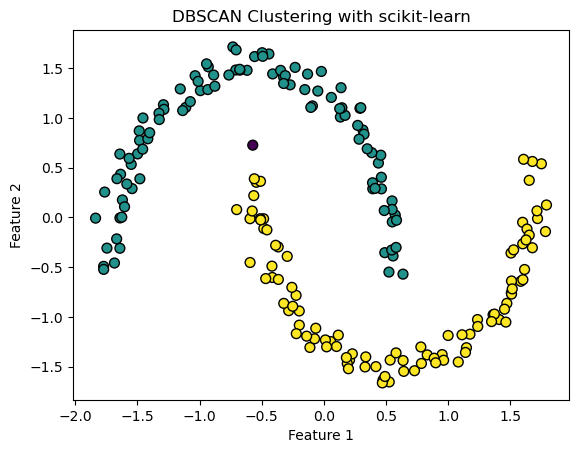

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (moon-shaped clusters)
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Standardize the features
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
epsilon = 0.3
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering with scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


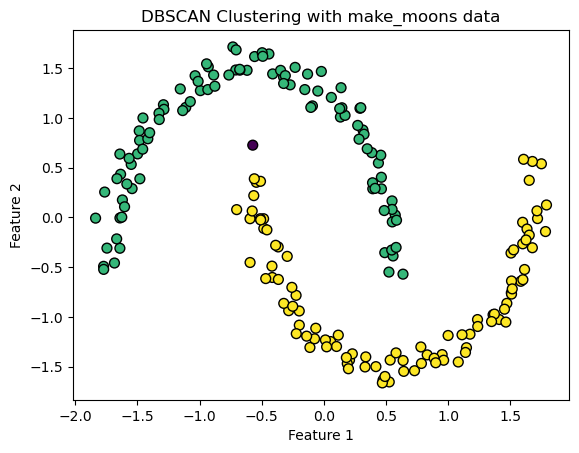

In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

def euclidean_distance(x1, x2):
    return torch.sqrt(torch.sum((x1 - x2)**2))

def range_query(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_index], data[i]) < epsilon:
            neighbors.append(i)
    return torch.tensor(neighbors, dtype=torch.long)

def expand_cluster(data, labels, point_index, neighbors, cluster_id, epsilon, min_samples):
    labels[point_index] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]
        if labels[neighbor] == -1:
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            new_neighbors = range_query(data, neighbor, epsilon)
            if len(new_neighbors) >= min_samples:
                neighbors = torch.cat((neighbors, new_neighbors))
        i += 1

def dbscan(data, epsilon, min_samples):
    labels = torch.zeros(len(data), dtype=torch.long)
    cluster_id = 1
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        neighbors = range_query(data, i, epsilon)
        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples)
            cluster_id += 1

    return labels

# Example usage with make_moons data:
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)
data = torch.tensor(X, dtype=torch.float32)
# data = torch.rand((100, 2))

epsilon = 0.3
min_samples = 5

cluster_labels = dbscan(data, epsilon, min_samples)
# print("cluster_labels", cluster_labels)

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels.numpy(), cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering with make_moons data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
